In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Task 1: Import necessary datasets,change to appropriate datatypes and combine the two datasets appropriately to create a 360-degree view of the data

In [2]:
claims = pd.read_excel('claims.xlsx')
cust_demo = pd.read_excel('cust_demographics.xlsx')

In [3]:
cust_demo['CUST_ID'] = cust_demo['CUST_ID'].astype(str)

In [4]:
claims['claim_id'] = claims['claim_id'].astype(str)
claims['customer_id'] = claims['customer_id'].astype(str)
claims['claim_amount'] = claims['claim_amount'].str.replace('$', '').astype(float)
claims['claim_date'] = pd.to_datetime(claims['claim_date'])

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  This is separate from the ipykernel package so we can avoid doing imports until


In [5]:
print(claims.dtypes)
print(cust_demo.dtypes)

claim_id                       object
customer_id                    object
incident_cause                 object
claim_date             datetime64[ns]
claim_area                     object
police_report                  object
claim_type                     object
claim_amount                  float64
total_policy_claims           float64
fraudulent                     object
dtype: object
CUST_ID                object
gender                 object
DateOfBirth    datetime64[ns]
State                  object
Contact                object
Segment                object
dtype: object


In [6]:
cust_demo.rename(columns={'CUST_ID':'customer_id'}, inplace=True)

In [8]:
print(cust_demo.customer_id.nunique())
print(claims.customer_id.nunique())

1085
1093


In [14]:
data = pd.merge(cust_demo, claims, on='customer_id', how='left')

In [15]:
data.shape

(1092, 15)

## Task 2: Of all the injury claims, some of them have gone unreported with the police. Create an alert flag(1,0) for all such claims.

In [16]:
data['Alert Flag (1/0)'] = np.where((data['claim_type']=='Injury only')
                                    &(data['police_report']=='No'),1,0)

In [17]:
data.head(10)

,customer_id,gender,DateOfBirth,State,Contact,Segment,claim_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent,Alert Flag (1/0)
0,21868593,Female,1979-01-12,VT,789-916-8172,Platinum,54004764,Driver error,2017-11-27,Auto,No,Material only,2980.0,1.0,No,0
1,75740424,Female,1970-01-13,ME,265-543-1264,Silver,33985796,Crime,2018-03-10,Home,Unknown,Material only,2980.0,3.0,No,0
2,30308357,Female,1984-03-11,TN,798-631-4758,Silver,53522022,Other driver error,2018-02-02,Auto,No,Material only,3369.5,1.0,Yes,0
3,30308357,Female,1984-03-11,TN,798-631-4758,Silver,63017412,Driver error,2018-04-04,Auto,No,Material only,1950.0,6.0,No,0
4,47830476,Female,1986-05-01,MA,413-187-7945,Silver,13015401,Natural causes,2018-06-17,Auto,No,Material only,1680.0,1.0,No,0
5,47830476,Female,1986-05-01,MA,413-187-7945,Silver,91609100,Natural causes,2017-12-04,Auto,Unknown,Material only,1440.0,1.0,No,0
6,19269962,Male,1977-05-13,NV,956-871-8691,Gold,22890252,Crime,2018-01-13,Auto,No,Material only,2680.0,1.0,No,0
7,19269962,Male,1977-05-13,NV,956-871-8691,Gold,39219616,Other causes,2018-09-26,Auto,No,Material only,2240.0,2.0,No,0
8,21831191,Male,1977-05-17,NH,419-712-8513,Gold,24050443,Other driver error,2017-04-10,Auto,No,Injury only,38306.5,3.0,Yes,1
9,21831191,Male,1977-05-17,NH,419-712-8513,Gold,91475471,Driver error,2018-09-02,Auto,Unknown,Material and injury,36810.0,1.0,No,0


In [18]:
data['Alert Flag (1/0)'].value_counts()

0    1032
1      60
Name: Alert Flag (1/0), dtype: int64

### Observation: There are 60 injury related claims that have gone unreported

## Task 3: Check for missing values and impute the missing values with an appropriate value. (mean for contiuous and mode for categorical)

In [19]:
data.isnull().values.any()

True

In [20]:
data['claim_amount'] = data['claim_amount'].fillna(data['claim_amount'].mean())

In [21]:
data['total_policy_claims'] = data['total_policy_claims'].fillna(round(data['total_policy_claims'].mean()))

In [22]:
data1 = data.reset_index() ## creating a copy

In [23]:
data1 = data1.apply(lambda x:x.fillna(x.value_counts().index[0])) ## for categorical values

In [24]:
data1.head()

,index,customer_id,gender,DateOfBirth,State,Contact,Segment,claim_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent,Alert Flag (1/0)
0,0,21868593,Female,1979-01-12,VT,789-916-8172,Platinum,54004764,Driver error,2017-11-27,Auto,No,Material only,2980.0,1.0,No,0
1,1,75740424,Female,1970-01-13,ME,265-543-1264,Silver,33985796,Crime,2018-03-10,Home,Unknown,Material only,2980.0,3.0,No,0
2,2,30308357,Female,1984-03-11,TN,798-631-4758,Silver,53522022,Other driver error,2018-02-02,Auto,No,Material only,3369.5,1.0,Yes,0
3,3,30308357,Female,1984-03-11,TN,798-631-4758,Silver,63017412,Driver error,2018-04-04,Auto,No,Material only,1950.0,6.0,No,0
4,4,47830476,Female,1986-05-01,MA,413-187-7945,Silver,13015401,Natural causes,2018-06-17,Auto,No,Material only,1680.0,1.0,No,0


## Task 7: Calculate the age of customers in years. Based on the age, categorize the customers into Children,Youth,Adult & Senior

In [25]:
max(data1['claim_date']) 

Timestamp('2018-12-09 00:00:00')

In [26]:
## Create Age column

data1['Age'] = (max(data1['claim_date']) - data1['DateOfBirth']).astype('<m8[Y]')

In [27]:
data1.head()

,index,customer_id,gender,DateOfBirth,State,Contact,Segment,claim_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent,Alert Flag (1/0),Age
0,0,21868593,Female,1979-01-12,VT,789-916-8172,Platinum,54004764,Driver error,2017-11-27,Auto,No,Material only,2980.0,1.0,No,0,39.0
1,1,75740424,Female,1970-01-13,ME,265-543-1264,Silver,33985796,Crime,2018-03-10,Home,Unknown,Material only,2980.0,3.0,No,0,48.0
2,2,30308357,Female,1984-03-11,TN,798-631-4758,Silver,53522022,Other driver error,2018-02-02,Auto,No,Material only,3369.5,1.0,Yes,0,34.0
3,3,30308357,Female,1984-03-11,TN,798-631-4758,Silver,63017412,Driver error,2018-04-04,Auto,No,Material only,1950.0,6.0,No,0,34.0
4,4,47830476,Female,1986-05-01,MA,413-187-7945,Silver,13015401,Natural causes,2018-06-17,Auto,No,Material only,1680.0,1.0,No,0,32.0


In [28]:
data1["Age"] = data1["Age"].astype(int)

In [29]:
data1.loc[(data1.Age < 18), 'Category'] = 'Children'
data1.loc[(data1.Age >= 18) & (data1.Age < 30), 'Category'] = 'Youth'
data1.loc[(data1.Age >= 30) & (data1.Age < 60), 'Category'] = 'Adult'
data1.loc[(data1.Age >= 60), 'Category'] = 'Senior'

In [30]:
data1.head()

,index,customer_id,gender,DateOfBirth,State,Contact,Segment,claim_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent,Alert Flag (1/0),Age,Category
0,0,21868593,Female,1979-01-12,VT,789-916-8172,Platinum,54004764,Driver error,2017-11-27,Auto,No,Material only,2980.0,1.0,No,0,39,Adult
1,1,75740424,Female,1970-01-13,ME,265-543-1264,Silver,33985796,Crime,2018-03-10,Home,Unknown,Material only,2980.0,3.0,No,0,48,Adult
2,2,30308357,Female,1984-03-11,TN,798-631-4758,Silver,53522022,Other driver error,2018-02-02,Auto,No,Material only,3369.5,1.0,Yes,0,34,Adult
3,3,30308357,Female,1984-03-11,TN,798-631-4758,Silver,63017412,Driver error,2018-04-04,Auto,No,Material only,1950.0,6.0,No,0,34,Adult
4,4,47830476,Female,1986-05-01,MA,413-187-7945,Silver,13015401,Natural causes,2018-06-17,Auto,No,Material only,1680.0,1.0,No,0,32,Adult


In [31]:
data1['Category'] = data1['Category'].astype(str)
data1['Category'].value_counts()

Adult    783
Youth    309
Name: Category, dtype: int64

## Task 4: The average amount claimed by the customers from various segments

In [32]:
data1.groupby('Segment').mean()['claim_amount']

Segment
Gold        12828.669339
Platinum    12342.985657
Silver      12210.651346
Name: claim_amount, dtype: float64

## Task 5: No of adults from TX, DE and AK who claimed insurance for drive related issues and causes

In [38]:
t5 = data1.loc[(data1['State']=='TX')|(data1['State']=='DE')|(data1['State']=='AK')]

In [40]:
t5_a = t5.loc[t5['Category']=='Adult']

In [41]:
t5_b = t5_a.loc[(t5_a['incident_cause']=='Driver error') | (t5_a['incident_cause']=='Other driver error')]

In [42]:
print("There are",t5_b['customer_id'].nunique(),"Adults")

There are 25 Adults


## Task 6: Pie chart of the aggregated value of claim amount based on gender and segment. Represent the claim amount as a percentage on the pie chart

In [43]:
q11_a = data1.groupby('gender').sum()['claim_amount'].reset_index()
q11_b = data1.groupby('Segment').sum()['claim_amount'].reset_index()

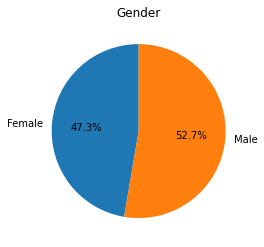

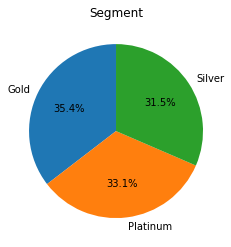

In [44]:
plt.figure(0)
plt.pie(q11_a['claim_amount'], labels=q11_a["gender"], autopct='%1.1f%%', startangle=90)
plt.title('Gender')
plt.figure(1)
plt.pie(q11_b['claim_amount'], labels=q11_b["Segment"], autopct='%1.1f%%', startangle=90)
plt.title('Segment')
plt.show()

## Task 7: Among males and females, which gender had claimed the most for any type of driver related issues?

In [45]:
q12 = data1[['gender','claim_amount']].loc[(data1['incident_cause']=='Driver error') | (data1['incident_cause']=='Other driver error')]

In [46]:
q12_a = q12.groupby('gender').sum()['claim_amount'].reset_index()

In [47]:
q12_a

,gender,claim_amount
0,Female,3.139645e+06
1,Male,4.017650e+06


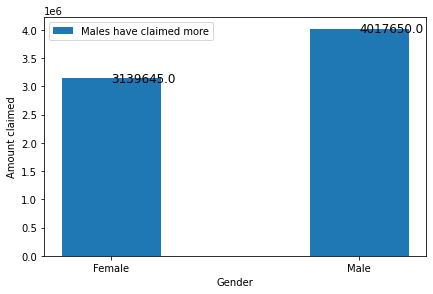

In [48]:
plt.bar(q12_a.gender, q12_a.claim_amount, label='Males have claimed more', width=0.4)

for index,data in enumerate(round(q12_a.claim_amount)):
    plt.text(x=index , y =data+1 , s=f"{data}" , fontdict=dict(fontsize=12), va='center')
plt.tight_layout()

plt.xlabel("Gender")
plt.ylabel("Amount claimed")

plt.legend()

plt.show()

## Task 8: Which age group had the maximum fraudulent policy claims?

In [49]:
q13 = data1['Category'].loc[data1['fraudulent']=='Yes'].reset_index()

In [50]:
q13_a = q13.groupby('Category').size().reset_index(name='count')

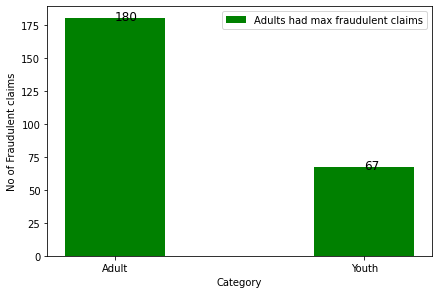

In [52]:
plt.bar(q13_a['Category'], q13_a['count'], label='Adults had max fraudulent claims', width=0.4,color='g')

for index,data in enumerate(q13_a['count']):
    plt.text(x=index , y =data+1 , s=f"{data}" , fontdict=dict(fontsize=12), va='center')
plt.tight_layout()

plt.xlabel("Category")
plt.ylabel("No of Fraudulent claims")

plt.legend()

plt.show()

## Task 9: Visualize the monthly trend of the total amount that has been claimed by the customers. Ensure that on the “month” axis, the month is in a chronological order not alphabetial order

In [53]:
data1['month'] = data1['claim_date'].dt.strftime('%b')

In [55]:
q14 = data1.groupby('month').sum()['claim_amount'].reset_index(name = 'Total')

In [56]:
months = ["Jan", "Feb", "Mar", "Apr", "May", "Jun", 
          "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"]
q14['month'] = pd.Categorical(q14['month'], categories=months, ordered=True)
q14.sort_values(by='month',inplace=True)
q14 = q14.reset_index(drop=True)
q14

,month,Total
0,Jan,1.377944e+06
1,Feb,9.882759e+05
2,Mar,1.365091e+06
3,Apr,1.156707e+06
4,May,9.678221e+05
5,Jun,1.415511e+06
6,Jul,1.520235e+06
7,Aug,7.946817e+05
8,Sep,1.099284e+06
9,Oct,1.573922e+06


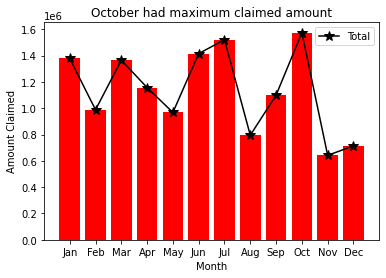

In [61]:
plt.bar(q14['month'], q14['Total'], color='r')
q14['Total'].plot(kind='line', marker='*', color='black', ms=10)
plt.title("October had maximum claimed amount")
plt.xlabel("Month")
plt.ylabel("Amount Claimed")

plt.legend()

plt.show()

## Task 10: An Indepenendent t-test to check if there is any similarity in the average amount claimed by males and females

In [63]:
data1['gender'].value_counts()

Male      558
Female    534
Name: gender, dtype: int64

In [64]:
import scipy.stats as stats

In [65]:
data1.groupby('gender').mean()['claim_amount']

gender
Female    12066.427278
Male      12851.677226
Name: claim_amount, dtype: float64

In [66]:
male=data1[data1.gender=='Male']
female=data1[data1.gender=='Female']

In [67]:
stats.ttest_ind(male.claim_amount,female.claim_amount,equal_var=False)

Ttest_indResult(statistic=0.9745190560269091, pvalue=0.3300151129588138)

### Null Hypothesis -> There is no significant difference in the avg amount claimed by both genders
### Alternate Hypothesis -> There is significant difference in the avg amount claimed by both genders
### Here p-value is 0.33 > 0.05 => Fail to reject Null Hypothesis. There is no statistical significant deifference between the amounts claimed by males and females       

## Task 11: A Chi_square test to study relationship between age category and segment

In [68]:
table = pd.crosstab(data1['Category'],data1['Segment'])
print(table)

Segment   Gold  Platinum  Silver
Category                        
Adult      276       253     254
Youth      100       112      97


In [69]:
val = stats.chi2_contingency(table)
val

(1.637890622943477,
 0.44089641776664734,
 2,
 array([[269.6043956 , 261.71703297, 251.67857143],
        [106.3956044 , 103.28296703,  99.32142857]]))

In [70]:
Observed_Values = table.values
Expected_Values = val[3]

In [71]:
no_of_rows=len(table.iloc[0:2,0])
no_of_columns=len(table.iloc[0,0:3])
ddof=(no_of_rows-1)*(no_of_columns-1)
print("Degree of Freedom: ",ddof)
alpha = 0.05

Degree of Freedom:  2


In [72]:
from scipy.stats import chi2

In [73]:
chi_square=sum([(o-e)**2./e for o,e in zip(Observed_Values,Expected_Values)])
chi_square_statistic=chi_square[0]+chi_square[1]

In [74]:
p_value=1-chi2.cdf(x=chi_square_statistic,df=ddof)

print('Significance level: ',alpha)
print('Degree of Freedom: ',ddof)
print('p-value:',p_value)

Significance level:  0.05
Degree of Freedom:  2
p-value: 0.4578975131992543


In [75]:
if p_value<=alpha:
    print("Reject Null i.e There is a relationship between Category and Segment")
else:
    print("Retain Null i.e There is no relationship between Category and Segment")

Retain Null i.e There is no relationship between Category and Segment


## Task 12: Correlation Matrix to check for existing relation between total number of policy claims and the claimed amount

In [76]:
import seaborn as sns

In [77]:
matrix =  data1.corr()

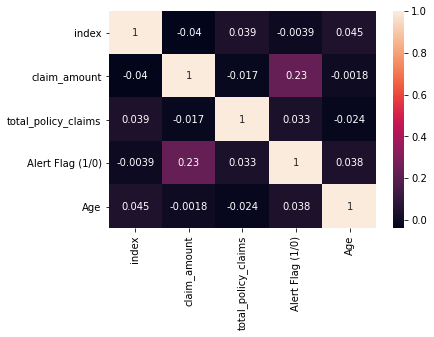

In [78]:
sns.heatmap(matrix, annot=True)
plt.show()

In [79]:
print('Correlation value of -0.017 suggests there is hardly any relationship b/w Total claims and claimed amount')

Correlation value of -0.017 suggests there is hardly any relationship b/w Total claims and claimed amount
